In [ ]:
'''
Author: Betty Liu
DATA201
Project 2 Linear regression
'''

'\nAuthor: Betty Liu\nDATA201\nProject 2 Linear regression\n'

**1. INTRO BELOW**

A dataset from **Data Montgomery** containing crime incidents, including details such as crime types, locations, and timestamps, along with the number of victims and other contextual information. This Dataset contains 421K rows, and 30 columns.

Link: https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3/about_data


Preliminary Questions:
* Any trends in crime activity by time of day or day of the week?
* What are the most frequent crime types, and how do they vary across different cities or police districts?
* Can we predict the number of victims based on crime type, location, and time of the incident?




**2. Data Wrangling with Pandas and Numpy**

In [ ]:
import pandas as pd

In [ ]:
crime_df= pd.read_csv('Crime_20241117.csv')

In [ ]:
crime_df.info()
print('Total missing Values', crime_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57406 entries, 0 to 57405
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Incident ID             57406 non-null  int64  
 1   Offence Code            57406 non-null  int64  
 2   CR Number               57406 non-null  int64  
 3   Dispatch Date / Time    51613 non-null  object 
 4   Start_Date_Time         57406 non-null  object 
 5   End_Date_Time           26671 non-null  object 
 6   NIBRS Code              57406 non-null  object 
 7   Victims                 57406 non-null  int64  
 8   Crime Name1             57406 non-null  object 
 9   Crime Name2             57406 non-null  object 
 10  Crime Name3             57406 non-null  object 
 11  Police District Name    57077 non-null  object 
 12  Block Address           53169 non-null  object 
 13  City                    57405 non-null  object 
 14  State                   54497 non-null

In [ ]:
crime_df2 = crime_df.dropna(subset = ['Dispatch Date / Time', 'Start_Date_Time','End_Date_Time'])
print('Total missing Values\n\n',crime_df2.isnull().sum())

Total missing Values

 Incident ID                   0
Offence Code                  0
CR Number                     0
Dispatch Date / Time          0
Start_Date_Time               0
End_Date_Time                 0
NIBRS Code                    0
Victims                       0
Crime Name1                   0
Crime Name2                   0
Crime Name3                   0
Police District Name        131
Block Address              1219
City                          1
State                      1451
Zip Code                     15
Agency                        1
Place                         1
Sector                        1
Beat                          1
PRA                           1
Address Number             1201
Street Prefix             22562
Street Name                 132
Street Suffix             23759
Street Type                 156
Latitude                      1
Longitude                     1
Police District Number        1
Location                      1
dtype: int64


In [ ]:
crime_df2.fillna('unknown', inplace = True)
print('Total missing Values\n\n',crime_df2.isnull().sum())

<ipython-input-6-f0a132dbd8a4>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  crime_df2.fillna('unknown', inplace = True)


Total missing Values

 Incident ID               0
Offence Code              0
CR Number                 0
Dispatch Date / Time      0
Start_Date_Time           0
End_Date_Time             0
NIBRS Code                0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
Block Address             0
City                      0
State                     0
Zip Code                  0
Agency                    0
Place                     0
Sector                    0
Beat                      0
PRA                       0
Address Number            0
Street Prefix             0
Street Name               0
Street Suffix             0
Street Type               0
Latitude                  0
Longitude                 0
Police District Number    0
Location                  0
dtype: int64


<ipython-input-6-f0a132dbd8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df2.fillna('unknown', inplace = True)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#Convert date and time
crime_df2['Start_Date_Time'] = pd.to_datetime(crime_df2['Start_Date_Time'], errors='coerce')
crime_df2['End_Date_Time'] = pd.to_datetime(crime_df2['End_Date_Time'], errors='coerce')



crime_df2['Start Date'] = crime_df2['Start_Date_Time'].dt.date
crime_df2['Start Time'] = crime_df2['Start_Date_Time'].dt.time
crime_df2['Year'] = crime_df2['Start_Date_Time'].dt.year
crime_df2['Month'] = crime_df2['Start_Date_Time'].dt.month
crime_df2['Start Day'] = crime_df2['Start_Date_Time'].dt.day_name()

crime_df2['Start Date'] = pd.to_datetime(crime_df2['Start Date'])



crime_df2['End Date'] = crime_df2['End_Date_Time'].dt.date
crime_df2['End Time'] = crime_df2['End_Date_Time'].dt.time
crime_df2['End Day'] = crime_df2['End_Date_Time'].dt.day_name()

crime_df2['End Date'] = pd.to_datetime(crime_df2['End Date'])

filtered_crime_df = crime_df2[
    (crime_df2['Start Date'].dt.year >= 2020) &
    (crime_df2['Start Date'].dt.year <= 2024)
]

<ipython-input-7-aacfb43570ac>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df2['Start_Date_Time'] = pd.to_datetime(crime_df2['Start_Date_Time'], errors='coerce')
<ipython-input-7-aacfb43570ac>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df2['End_Date_Time'] = pd.to_datetime(crime_df2['End_Date_Time'], errors='coerce')


**3. EDA principles and Matplotlib/ Seabord to Visualize data**

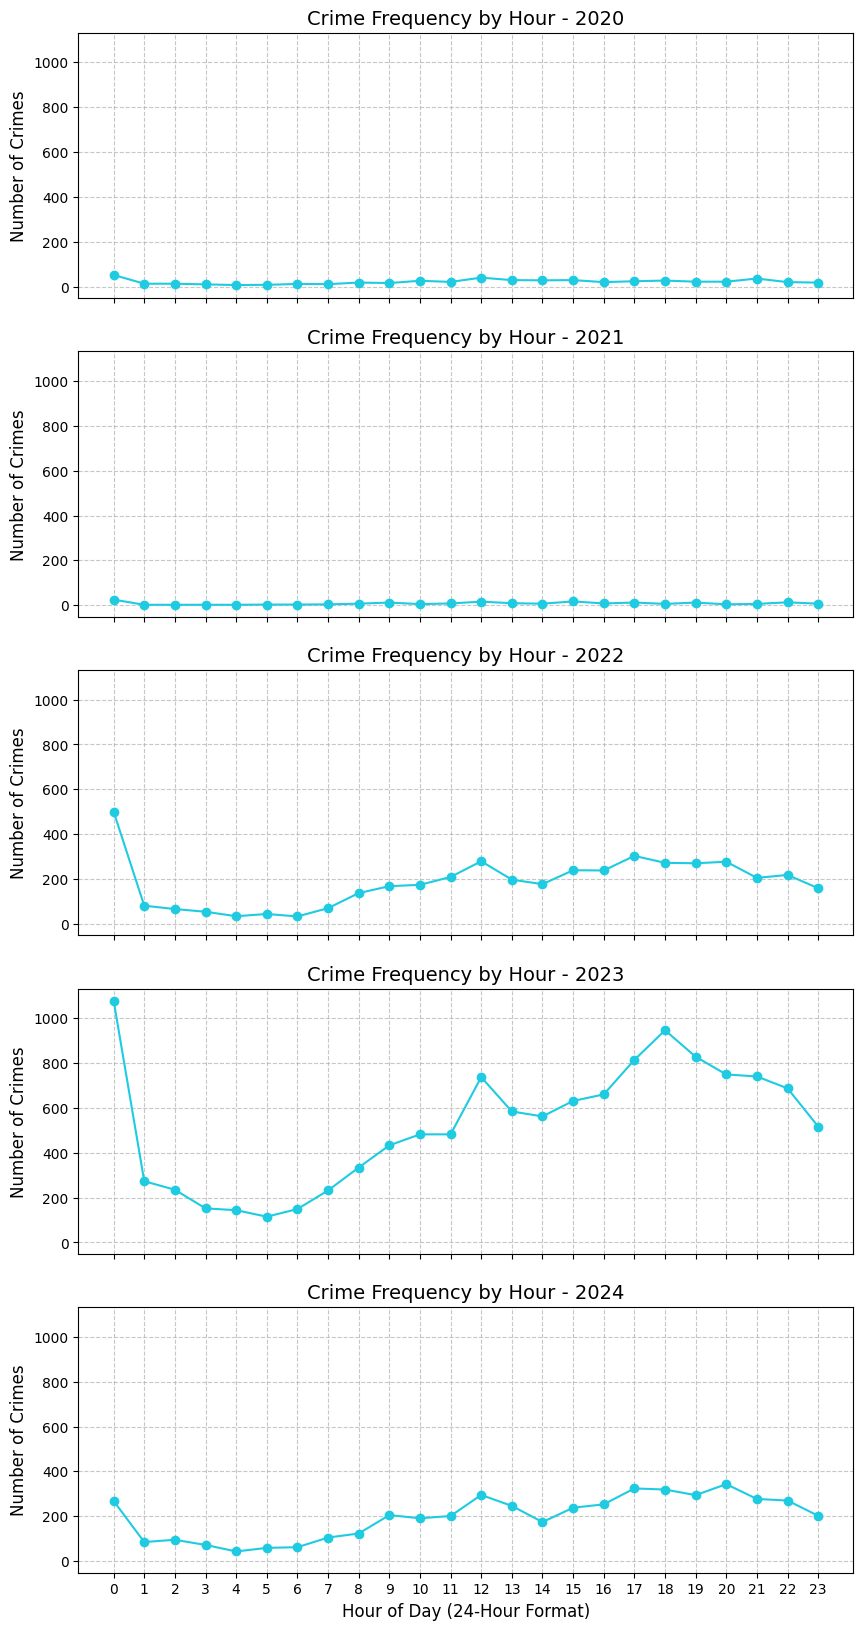

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Extract the hour
filtered_crime_df['Hour'] = pd.to_datetime(filtered_crime_df['Start Time'], format='%H:%M:%S').dt.hour

#Group by year and hour
yearly_hourly_crime = filtered_crime_df.groupby(['Year', 'Hour']).size().reset_index(name='Crime_Count')

# List of unique years
years = yearly_hourly_crime['Year'].unique()

#subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(10, len(years) * 4), sharex=True, sharey=True)

for i, year in enumerate(sorted(years)):
    ax = axes[i]
    data = yearly_hourly_crime[yearly_hourly_crime['Year'] == year]
    ax.plot(data['Hour'], data['Crime_Count'], marker='o', linestyle='-', label=f'{year}', color='#1ecbe1')
    ax.set_title(f'Crime Frequency by Hour - {year}', fontsize=14)
    ax.set_ylabel('Number of Crimes', fontsize=12)
    ax.grid(axis='both', linestyle='--', alpha=0.7)


plt.xlabel('Hour of Day (24-Hour Format)', fontsize=12)
plt.xticks(range(0, 24))

plt.show()


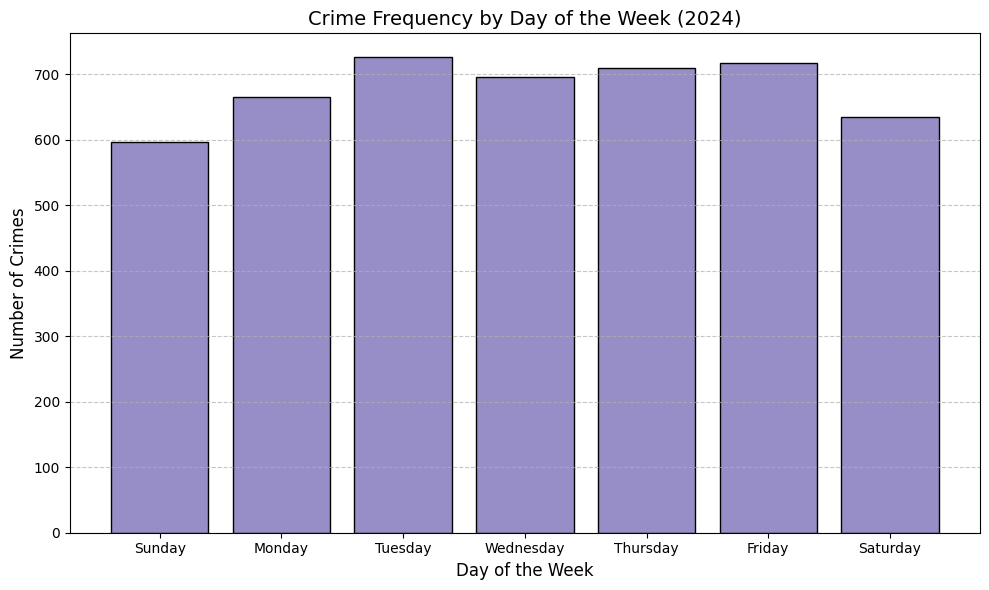

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Filter data for year 2024
data_2024 = filtered_crime_df[filtered_crime_df['Year'] == 2024]

#Group by Day of the Week and count
daywise_crime = data_2024.groupby('Start Day').size().reset_index(name='Crime_Count')

#Sort days of the week in order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daywise_crime['Start Day'] = pd.Categorical(daywise_crime['Start Day'], categories=day_order, ordered=True)
daywise_crime = daywise_crime.sort_values('Start Day')

# Plot data
plt.figure(figsize=(10, 6))
plt.bar(daywise_crime['Start Day'], daywise_crime['Crime_Count'], color='#978ec7', edgecolor='#000000')

plt.title('Crime Frequency by Day of the Week (2024)', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**4.Scikit-learn Linear regression to  train, test and predict a numerical target
variable. Use appropriate metric and interpret the meaning of the score.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Filter data for the year 2024
data_2024 = filtered_crime_df[filtered_crime_df['Year'] == 2024]

# Extract relevant features and the target variable
# Convert categorical day names to numerical values
categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_2024['Day_Index'] = pd.Categorical(data_2024['Start Day'], categories=categories, ordered=True).codes

# Define independent features and the target variable
data_2024['Hour'] = pd.to_datetime(data_2024['Start Time'], format='%H:%M:%S').dt.hour
X = data_2024[['Day_Index', 'Hour']]  # Features
y = data_2024['Victims']  # Target variable: Victims

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

# Model coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)



Mean Squared Error (MSE): 0.026462409331497
R2 Score: -0.002313182617036391
Intercept (b0): 1.0258612359988277
Coefficients (b1, b2): [ 0.00288301 -0.00120077]


**5. Plot *Histogram* of residuals and check if they have GAUSSIAN Distribution**

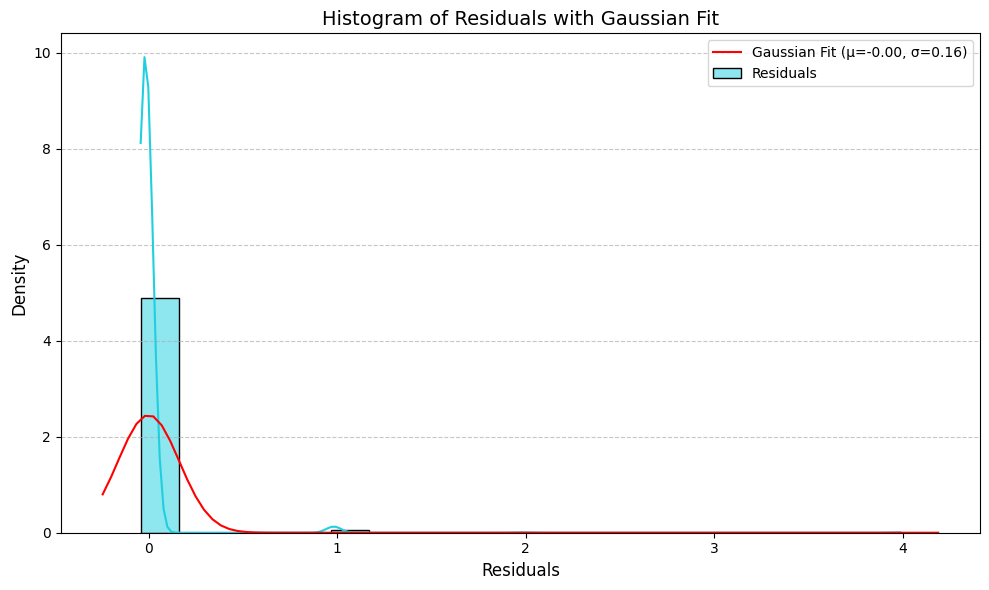

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#Residuals
residuals = y_test - y_pred

#Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20, color='#1fcfe0', stat="density", label='Residuals')

#Gaussian distribution
mu, std = norm.fit(residuals)  # Fit a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', label='Gaussian Fit (μ={:.2f}, σ={:.2f})'.format(mu, std))

#Labels and title
plt.title('Histogram of Residuals with Gaussian Fit', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**6. *Scatterplot* of predicted values and residuals to check assumption of
homoscedasticity**

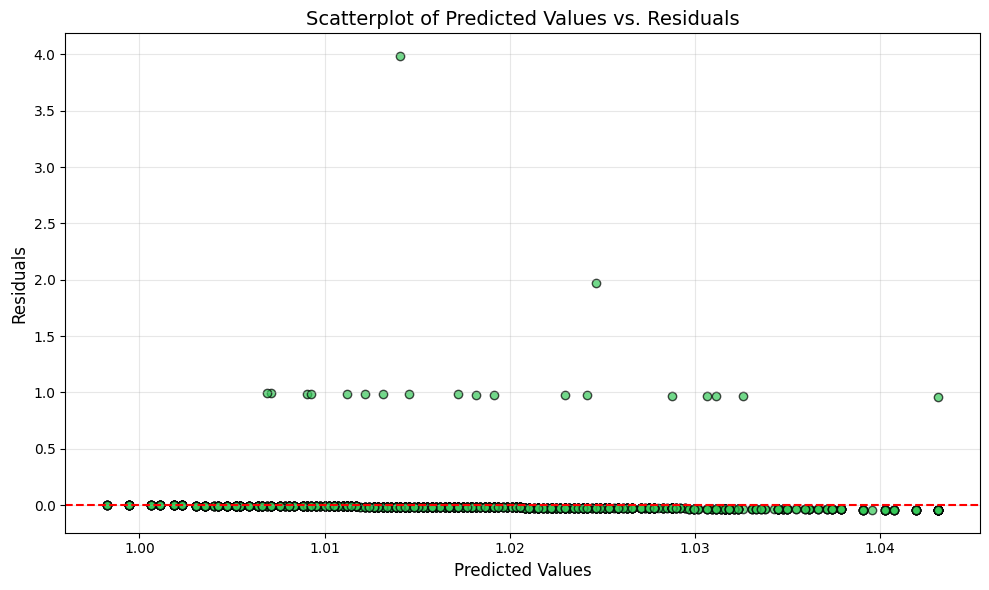

In [ ]:
import matplotlib.pyplot as plt

#Residuals
residuals = y_test - y_pred

#Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='#36c959', edgecolor='#000000')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

#Labels and title
plt.title('Scatterplot of Predicted Values vs. Residuals', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**7. Interpret the coefficients of the linear regression**

In [ ]:
# Interpretation of the coefficients
print("\nInterpretation:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Day_Index (b1): {model.coef_[0]:.2f} - Change in Victims per day of the week.")
print(f"Coefficient for Hour (b2): {model.coef_[1]:.2f} - Change in Victims per hour of the day.")



Interpretation:
Intercept: 1.03
Coefficient for Day_Index (b1): 0.00 - Change in Victims per day of the week.
Coefficient for Hour (b2): -0.00 - Change in Victims per hour of the day.


On average, there are about 1.01 victims in a crime incident when all other factors are at their baseline values.
Changing the day of the week has no significant impact on the number of victims, as the coefficient is essentially zero.
Vhanging the hour of the day has no meaningful impact on the number of victims, as the coefficient is very close to zero.
Neither the day of the week nor the time of day appears to strongly influence the number of victims in this dataset.